**Oppgave**      

En bedrift produserer goder med følgende produktfunksjon:


\begin{equation}
    x = f(N,K)=N^{0.5}K^{0.5}\tag{1}
\end{equation}

På kort sikt har bedriften tilgang til begrenset kapital $K_0=10$. Prisen per enhet kapital er fast $r=500$ NOK, mens én time med arbeidskraft koster $w=350$ NOK. På kort sikt kan bedriften velge hvor mange timer arbeidskraft som tilsettes. Bedriften leier et bygg til produksjonen av produktet, og dette koster 10 000 NOK (faste kostnader).      
a) Finn et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_s(x, K_0)$. Tegn denne funksjon i en figur med produksjon på den horisontale aksen. Tegn også kostnadsfunksjonen som oppstår når kapitalbeholdningen økes til $K_1=50$. Kommenter dine funn.   
b) I en ny figur tegn totale gjennomsnittskostnader på kort sikt, variabler gjennomsnittskostnader på kort sikt, og grensekostnaden på kort sikt. Kommenter og forklar forholdet mellom total og variabel gjennomsnittskostnad og grensekostnaden.       
c) Hvilke skalaegenskaper viser denne produktfunksjon?

In [1]:
# importer pakker
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

# definer symboler. X blir produksjonsmålet, lmda er Lagrange multiplikatoren

a, b, N, K, X, lmda, w, r, x = sp.symbols('a b N K X \lambda w r x', real=True, positive=True)

#sette verdier
K_0 = 10
K_1 = 50
r = 500
w = 350

Eq = sp.Eq(N**0.5*K**0.5, x)
prod = sp.solve(Eq, N)[0]
func = sp.lambdify((x, K), prod)

def kost(x, K):
 return w*func(x,K) + r*K + 10000

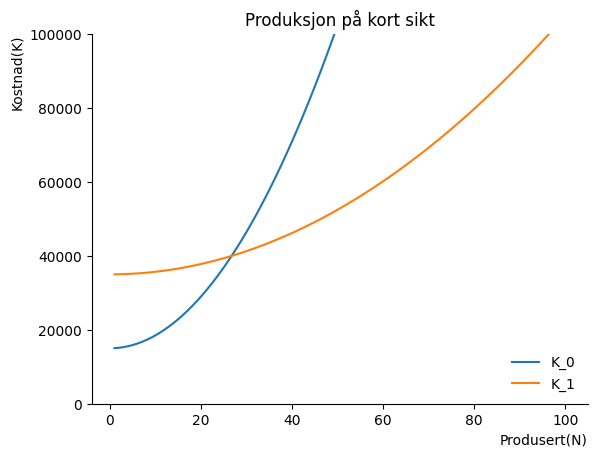

In [2]:
n=np.linspace(1,100,100)

fig, ax = plt.subplots()
ax.set_ylabel('Kostnad(K)', loc='top')
ax.set_xlabel('Produsert(N)', loc='right')
ax.set_ylim(0, 100000)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                
# plott
ax.plot(n, kost(n,K_0), label='K_0')
ax.plot(n, kost(n,K_1), label='K_1')

ax.set_title('Produksjon på kort sikt')
ax.legend(loc='lower right',frameon=False);

vi kan se at kostnadsfunksjonen k_0 der kapitalen er lav gjør at kostnaden er høyere for hver produserte enhet,  konstnadsfunksjonen k_1 der kapitalen er høy gjør at kostnaden er lavere for hver produserte enhet.

In [3]:
#beregne grenseverdien
grense = sp.diff(kost(X,K),X)
gk = sp.lambdify((X,K),grense)

totgk = kost(X,K)/X
tgk = sp.lambdify((X,K),totgk)

#beregne variabelkostnaden
variabelgk = (kost(X,K)-10000)/X

vgk = sp.lambdify((X,K),variabelgk)

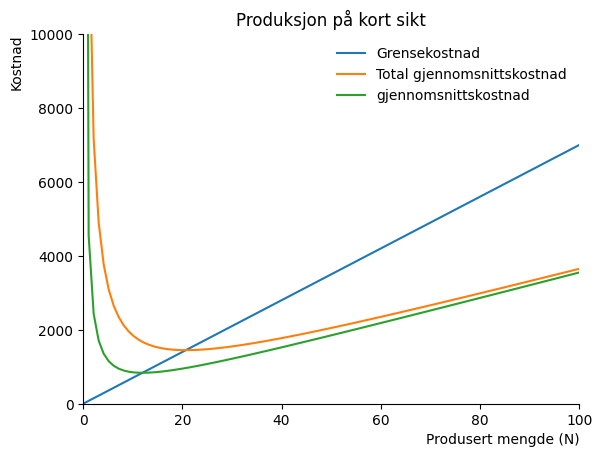

In [4]:
n=np.linspace(0.1,100,100)

fig, ax = plt.subplots()
ax.set_ylabel('Kostnad', loc='top')
ax.set_xlabel('Produsert mengde (N)', loc='right')
ax.set_ylim(0, 10000)
ax.set_xlim(0, 100)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# plott funksjonen
ax.plot(n, gk(n,K_0), label='Grensekostnad')
ax.plot(n, tgk(n,K_0), label='Total gjennomsnittskostnad')
ax.plot(n, vgk(n,K_0), label='gjennomsnittskostnad')

ax.set_title('Produksjon på kort sikt')
ax.legend(loc='upper right',frameon=False);

c)
Skalaegenskapen til produktfunksjonen beskriver hvordan produksjonskostnadene endrer seg når produksjonsfaktorene endres. I dette tilfellet viser skalaegenskapen at når kapitalbeholdningen øker, vil produksjonskostnadene også øke.

Dette skyldes at kapitalbeholdningen er en fast produksjonsfaktor på kort sikt, noe som betyr at økningen av kapitalbeholdningen vil resultere i en økning i produksjonsmengden. Siden produksjonskostnadene er avhengige av produksjonsmengden, vil økningen i produksjonsmengden føre til økte produksjonskostnader.

Med andre ord, når bedriften har en fast kapitalbeholdning på kort sikt, så vil økning i antall enheter som produseres føre til økte produksjonskostnader. Derfor må bedriften være nøye med å vurdere hvor mye kapital de har tilgjengelig for å produsere varer og tjenester på kort sikt, for å unngå unødvendig høye produksjonskostnader.

**Oppgave**         
*Hvorfor er det relative forholdet mellom K og N i en optimal løsning kun avhengig av økonomiske faktorer her, og ikke produksjonselastisitetene (dvs faktorer fra produktfunksjonen)? Undersøk din løsning ved å kjøre samme analyse som ovenfor med en generell Cobb-Douglas produktfunksjon $x=N^aK^b$, hvor $a,b>0$ er produksjonselastisitetene til arbeidskraft og kapital.*

In [7]:
# Skriv ditt svar her
a, b, N, K, X, lmda, w, r, x = sp.symbols('a b N K X \lambda w r x', real=True, positive=True)
def cobb(N,K):
    return (N**a)*(K**b)

# Lagrange likning
L=w*N + r*K-lmda*(cobb(N,K)-X)

dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)

rel_w=(dL_N.args[0]/dL_K.args[0])

mtsb=sp.diff(cobb(N,K),N)/sp.diff(cobb(N,K),K)

optimal = sp.Eq(rel_w,mtsb)
display(optimal)

Eq(w/r, K*a/(N*b))

Den optimale forholdet mellom kapital og arbeidskraft i en produksjonsprosess er kun avhengig av økonomiske faktorer og påvirkes ikke av produksjonselastisitetene. Dette skyldes at elastisitetene er konstante og ikke påvirker den relative prisen på arbeidskraft og kapital. Derfor bidrar både arbeidskraft og kapital like mye til produksjonsprosessen. Dette prinsippet gjelder uavhengig av detaljene i produksjonsfunksjonen eller teknologien som brukes.